In [1]:
!pip install uproot awkward 
from uproot_io import Events, View
import numpy as np
import matplotlib.pyplot as plt
import features as f

cheated_0 = Events('CheatedRecoFile_0.root')

  Using cached uproot-5.5.1-py3-none-any.whl.metadata (33 kB)
  Using cached awkward-2.7.1-py3-none-any.whl.metadata (7.0 kB)
  Using cached cramjam-2.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.9 kB)
  Using cached awkward_cpp-42-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
Using cached uproot-5.5.1-py3-none-any.whl (362 kB)
Using cached awkward-2.7.1-py3-none-any.whl (863 kB)
Using cached awkward_cpp-42-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (637 kB)
Using cached cramjam-2.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.4 MB)


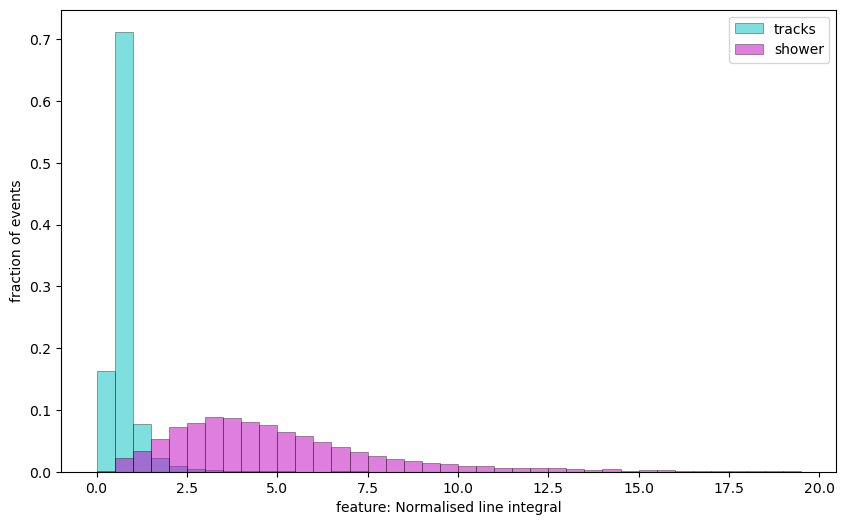

In [2]:
def two_arrays_normalised_arc_length(events, hits_cutoff): # arc length of a piecewise linear curve
    events_size = len(events.num_final_state_particles) # number of events in the file

    track_arc_l = []
    shower_arc_l = []
    
    for i in range(events_size):
        w_hits = np.array(events.reco_hits_w[i])
        x_hits = np.array(events.reco_hits_x_w[i])
        if len(w_hits) > hits_cutoff:
            
            # Calculate differences between consecutive points
            dx = np.diff(w_hits)
            dy = np.diff(x_hits)
            
            # Compute segment lengths
            segment_lengths = np.sqrt(dx**2 + dy**2)
            
            # Total arc length (line integral)
            total_length = np.sum(segment_lengths)
            
            # Normalize by the number of points
            normalized_length = total_length / len(w_hits)

            if events.mc_pdg[i] in [-11, 11, 22]:
                shower_arc_l.append(normalized_length)
            else: track_arc_l.append(normalized_length)

    return track_arc_l, shower_arc_l

track_arc_l, shower_arc_l = two_arrays_normalised_arc_length(cheated_0, 15)

arc_pdf = f.feature_histogram('Normalised line integral', track_arc_l, shower_arc_l, np.arange(0, 20, 0.5))

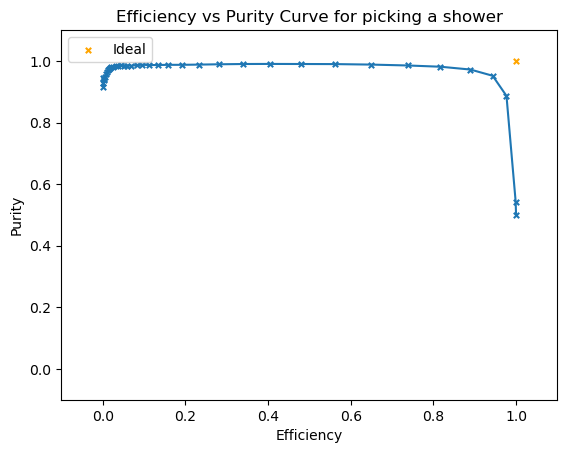

In [3]:
f.ROC(arc_pdf)

In [11]:
def track_shower_tally(events, hits_cutoff):
    n = len(events.num_final_state_particles)

    tracks = 0
    showers = 0
    
    for i in range(n):
        if len(events.reco_hits_w[i]) > hits_cutoff:
            indicator = events.mc_pdg[i]
    
            if indicator in [-11, 11, 22]:
                showers += 1
            else: tracks += 1

    print(f'{tracks} Tracks, {showers} showers. Cutoff: {hits_cutoff}')

for c in range(0,16):
    track_shower_tally(cheated_0,c)

90492 Tracks, 364581 showers. Cutoff: 0
67991 Tracks, 211427 showers. Cutoff: 1
54014 Tracks, 97174 showers. Cutoff: 2
47760 Tracks, 49517 showers. Cutoff: 3
43830 Tracks, 32040 showers. Cutoff: 4
40929 Tracks, 26865 showers. Cutoff: 5
38593 Tracks, 25197 showers. Cutoff: 6
36740 Tracks, 24591 showers. Cutoff: 7
35075 Tracks, 24227 showers. Cutoff: 8
33593 Tracks, 23912 showers. Cutoff: 9
32359 Tracks, 23575 showers. Cutoff: 10
31226 Tracks, 23236 showers. Cutoff: 11
30176 Tracks, 22869 showers. Cutoff: 12
29252 Tracks, 22488 showers. Cutoff: 13
28373 Tracks, 22046 showers. Cutoff: 14
27519 Tracks, 21636 showers. Cutoff: 15
